# Task 1b Visualization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [3]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# Read image
_img1 = cv2.imread("../data/CheckerWarp.png")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

## Visualize Convolution Kernel

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


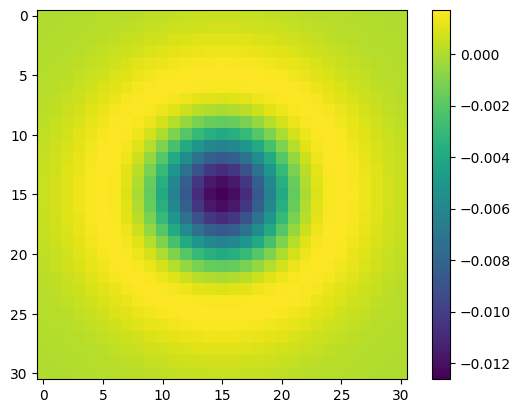

In [5]:
sys.path.append('..')
from task1b.blob import convolution_kernel

k = convolution_kernel(5, device)
plt.imshow(k.cpu().numpy())
plt.colorbar()

# Visualize Keypoints

In [6]:
def show_keypoints(I, keypoints):
    cv2_keypoints = [] 
    for i in range(0, keypoints.shape[0]):
        pos = keypoints[i,0:2]
        scale = keypoints[i,2]
        cv2_keypoints.append(cv2.KeyPoint(pos[1].item(), pos[0].item(), scale.item()))
    result = cv2.drawKeypoints(
        I, 
        cv2_keypoints, 
        0, 
        (-1, -1, -1), 
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    plt.imshow(result)

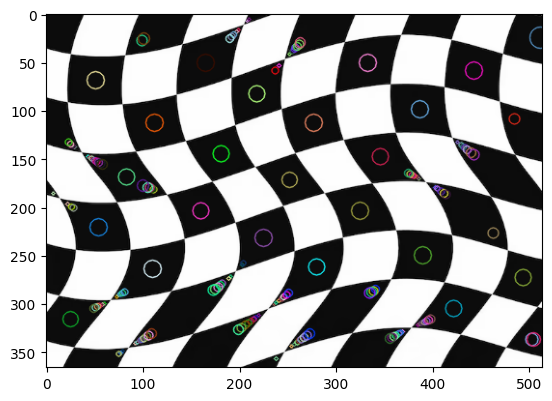

In [7]:
# Detect keypoints on test pattern

from task1b.blob import SIFTDetector

d = SIFTDetector()
keypoints = d.detect_keypoints(I, threshold=0.7)

show_keypoints(_gray1, keypoints)

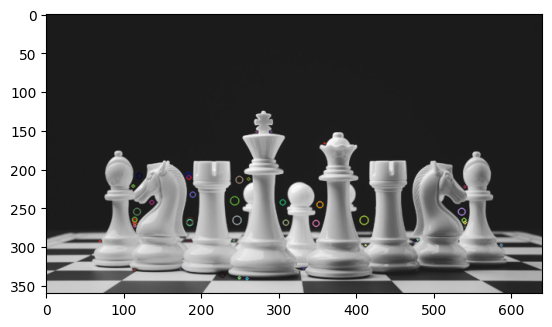

In [8]:
# Detect keypoints on real image

# PLEASE NOTE: You will see blobs in homogeneous areas as well. The full SIFT descriptor requires to 
# filter these out by checking if sufficient structure is present in the image (you don't need to do this). 

_img1 = cv2.imread("../data/Chess.png")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

keypoints = d.detect_keypoints(I, threshold=0.6)

show_keypoints(_gray1, keypoints)

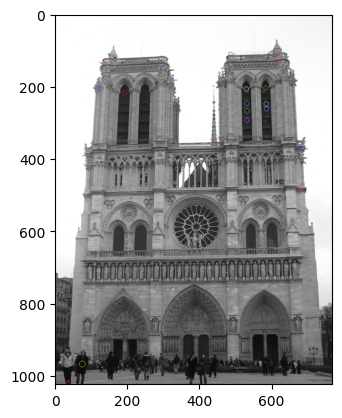

In [9]:
# Detect keypoints on real image

# PLEASE NOTE: You will see blobs in homogeneous areas as well. The full SIFT descriptor requires to 
# filter these out by checking if sufficient structure is present in the image (you don't need to do this). 

_img1 = cv2.imread("../data/NotreDame1.jpg")
_color1 = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
_gray1 = cv2.cvtColor(_color1, cv2.COLOR_RGB2GRAY)

img1 = torch.tensor(_img1, device=device) / 255
color1 = torch.tensor(_color1, device=device) / 255
gray1 = torch.tensor(_gray1, device=device) / 255

I = gray1

keypoints = d.detect_keypoints(I, threshold=0.4)

show_keypoints(_gray1, keypoints)